In [115]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import LeagueDashPlayerStats

In [116]:
stats = LeagueDashPlayerStats(season = '2024-25', per_mode_detailed = 'PerGame')
df = stats.get_data_frames()[0]
print(df.nlargest(10, 'PTS'))

     PLAYER_ID              PLAYER_NAME NICKNAME     TEAM_ID  \
490    1628983  Shai Gilgeous-Alexander     Shai  1610612760   
180     203507    Giannis Antetokounmpo  Giannis  1610612749   
423     203999             Nikola Jokić   Nikola  1610612743   
366    1629029              Luka Dončić     Luka  1610612747   
29     1630162          Anthony Edwards  Anthony  1610612750   
263    1628369             Jayson Tatum   Jayson  1610612738   
330     201142             Kevin Durant    Kevin  1610612756   
545    1630178             Tyrese Maxey   Tyrese  1610612755   
69     1630595          Cade Cunningham     Cade  1610612765   
226    1628973            Jalen Brunson    Jalen  1610612752   

    TEAM_ABBREVIATION   AGE  GP   W   L  W_PCT  ...  BLKA_RANK  PF_RANK  \
490               OKC  26.0  76  63  13  0.829  ...         29      132   
180               MIL  30.0  67  40  27  0.597  ...         14       95   
423               DEN  30.0  70  46  24  0.657  ...         43      10

In [117]:
path = r'D:\NBA Hidden Gem Project\data\nba_players_2024_25.csv'
df.to_csv(path, index = False)

In [118]:
print(df.columns.tolist())

['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT']


In [119]:
#Important columns
#Min - Minutes played, important to see how often a player plays and for how long
#FG_PCT and FGM - field goals attempted and made are important to see a players effiency
#PLUS_MINUS - shows a players affect on the court and if he helps the team or not when on the court
#W_PCT - win percentage shows how often this player wins games when played
#AST - how many assit does this player get when playing, expected number is lower for bigs, can even look at the turnover rate 
#FG3_PCT - how good of a shooter is this player, the game now is built around the 3 point shot
#REB - how good is this player at rebounding

In [120]:
print("Average minutes:", df['MIN'].mean())
print("Median minutes:", df['MIN'].median())
print("Min minutes:", df['MIN'].min())
print("Max minutes:", df['MIN'].max())

Average minutes: 19.428998242530756
Median minutes: 19.5
Min minutes: 0.9
Max minutes: 37.7


In [121]:
role_players = df[(df['MIN'] >= 15) & (df['MIN'] <= 25) & (df['GP'] >= 30)].copy()

In [122]:
print(role_players.head())

    PLAYER_ID    PLAYER_NAME NICKNAME     TEAM_ID TEAM_ABBREVIATION   AGE  GP  \
1     1631260       AJ Green       AJ  1610612749               MIL  25.0  73   
5     1630174  Aaron Nesmith    Aaron  1610612754               IND  25.0  45   
6     1630598  Aaron Wiggins    Aaron  1610612760               OKC  26.0  76   
9     1641737      Adem Bona     Adem  1610612755               PHI  22.0  58   
10    1642349  Ajay Mitchell     Ajay  1610612760               OKC  23.0  36   

     W   L  W_PCT  ...  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  \
1   44  29  0.603  ...        520      136       394       278   
5   29  16  0.644  ...        182       52       169       147   
6   62  14  0.816  ...        170      349       326       146   
9   12  46  0.207  ...        373      134       192       355   
10  31   5  0.861  ...        299      199       197       322   

    PLUS_MINUS_RANK  NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  \
1                83                   342       281

In [123]:
print(role_players.shape)

(154, 67)


In [124]:
role_players_points = role_players.nlargest(10,'PTS')[['PLAYER_NAME','TEAM_ABBREVIATION','MIN','PTS']]
print(role_players_points)

            PLAYER_NAME TEAM_ABBREVIATION   MIN   PTS
285    Jonathan Kuminga               GSW  24.3  15.3
406       Moritz Wagner               ORL  18.8  12.9
321      Keldon Johnson               SAS  23.9  12.7
561  Zaccharie Risacher               ATL  24.6  12.6
538           Ty Jerome               CLE  19.9  12.5
115      Daniel Gafford               DAL  21.5  12.3
79         Caris LeVert               ATL  24.9  12.1
5         Aaron Nesmith               IND  24.9  12.0
6         Aaron Wiggins               OKC  22.9  12.0
505          Tari Eason               HOU  24.9  12.0


In [125]:
#What gives a role player value?
#Stats that matter and show efficeney:
#PLUS_MINUS,FGM,FG_PCT,EFFICENCY
#EFFICIENCY = FG_PCT

In [126]:
role_players['PTS_per_min'] = role_players['PTS']/role_players['MIN']
role_players['AST_per_min'] = role_players['AST']/role_players['MIN']
role_players['STL_per_min'] = role_players['STL']/role_players['MIN']
role_players['REB_per_min'] = role_players['REB']/role_players['MIN']
role_players['PLUS_MINUS_per_min'] = role_players['PLUS_MINUS']
print(role_players[['PLAYER_NAME','TEAM_ABBREVIATION','MIN','PTS','PTS_per_min','AST_per_min','STL_per_min','REB_per_min','PLUS_MINUS_per_min']].head(10))

       PLAYER_NAME TEAM_ABBREVIATION   MIN   PTS  PTS_per_min  AST_per_min  \
1         AJ Green               MIL  22.7   7.4     0.325991     0.066079   
5    Aaron Nesmith               IND  24.9  12.0     0.481928     0.048193   
6    Aaron Wiggins               OKC  22.9  12.0     0.524017     0.078603   
9        Adem Bona               PHI  15.6   5.8     0.371795     0.032051   
10   Ajay Mitchell               OKC  16.6   6.5     0.391566     0.108434   
12      Alec Burks               MIA  17.6   7.3     0.414773     0.062500   
13     Alex Caruso               OKC  19.3   7.1     0.367876     0.129534   
21     Amir Coffey               LAC  24.3   9.7     0.399177     0.045267   
22  Andre Drummond               PHI  18.8   7.3     0.388298     0.047872   
27   Anthony Black               ORL  24.2   9.4     0.388430     0.128099   

    STL_per_min  REB_per_min  PLUS_MINUS_per_min  
1      0.022026     0.105727                 3.1  
5      0.032129     0.160643           

In [127]:
role_players['value_score'] = (
    role_players['PTS_per_min'] * 3 +
    role_players['AST_per_min'] * 2 +
    role_players['STL_per_min'] * 2 +
    role_players['REB_per_min'] * 1 +
    role_players['PLUS_MINUS_per_min'] * 2 +
    role_players['FG_PCT'] * 1
)

In [128]:
top_gems = role_players.nlargest(20, 'value_score')[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'MIN', 'value_score']]
print(top_gems)

           PLAYER_NAME TEAM_ABBREVIATION   MIN  value_score
199         Isaiah Joe               OKC  21.7    16.972719
6        Aaron Wiggins               OKC  22.9    16.057432
261    Jaylin Williams               OKC  16.7    15.005467
13         Alex Caruso               OKC  19.3    13.924756
369        Luke Kornet               BOS  18.6    13.146495
324   Kenrich Williams               OKC  16.4    11.692756
538          Ty Jerome               CLE  19.9    11.578312
131          Dean Wade               CLE  21.2    11.163943
481         Sam Hauser               BOS  21.7    11.111829
5        Aaron Nesmith               IND  24.9    11.074068
194        Isaac Okoro               CLE  19.1    10.936251
482        Sam Merrill               CLE  19.7    10.837472
79        Caris LeVert               ATL  24.9    10.398727
399        Mike Conley               MIN  24.7     9.354656
137   Dereck Lively II               DAL  23.1     9.216286
10       Ajay Mitchell               OKC

In [129]:
role_players['hidden_gem_score'] = role_players['value_score'] * (1.0 - role_players['W_PCT'])

In [130]:
top_hidden_gems = role_players.nlargest(20, 'hidden_gem_score')[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'MIN', 'W_PCT', 'value_score', 'hidden_gem_score','GP']]
print(top_hidden_gems)

           PLAYER_NAME TEAM_ABBREVIATION   MIN  W_PCT  value_score  \
364         Lonzo Ball               CHI  22.2  0.457     7.760595   
5        Aaron Nesmith               IND  24.9  0.644    11.074068   
409     Mouhamed Gueye               ATL  16.1  0.455     7.198640   
137   Dereck Lively II               DAL  23.1  0.583     9.216286   
125     Day'Ron Sharpe               BKN  18.1  0.280     5.082326   
369        Luke Kornet               BOS  18.6  0.726    13.146495   
399        Mike Conley               MIN  24.7  0.620     9.354656   
563          Zach Edey               MEM  21.5  0.530     7.389302   
343          Kris Dunn               LAC  24.1  0.608     8.750203   
401      Miles McBride               NYK  24.9  0.609     8.564233   
138  Derrick Jones Jr.               LAC  24.3  0.623     8.460979   
1             AJ Green               MIL  22.7  0.603     7.888912   
12          Alec Burks               MIA  17.6  0.531     6.403545   
55      Brandon Clar

In [145]:
top_15 = role_players.nlargest(15,'hidden_gem_score')
plt.figure(figsize=(10,8))
top_15 = top_15.sort_values('hidden_gem_score', ascending=True)
top_15['player_team'] = top_15['PLAYER_NAME'] + ' (' + top_15['TEAM_ABBREVIATION'] + ')'

<Figure size 1000x800 with 0 Axes>

In [146]:
y = top_15['player_team']  # Get the player name column
x = top_15['hidden_gem_score']  # Get the hidden gem score column

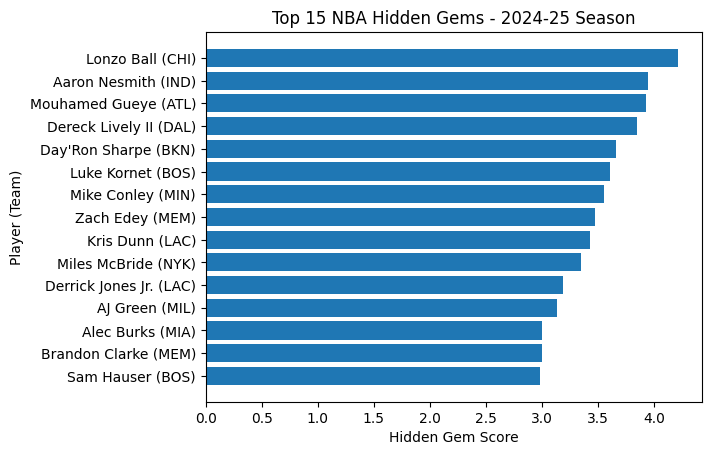

In [157]:
plt.barh(y, x)
plt.ylabel('Player (Team)')
plt.xlabel("Hidden Gem Score") 
plt.title('Top 15 NBA Hidden Gems - 2024-25 Season')
plt.savefig(r'D:\NBA Hidden Gem Project\viusalizations\top_15_graph.png',dpi = 300, bbox_inches = 'tight')
plt.show()

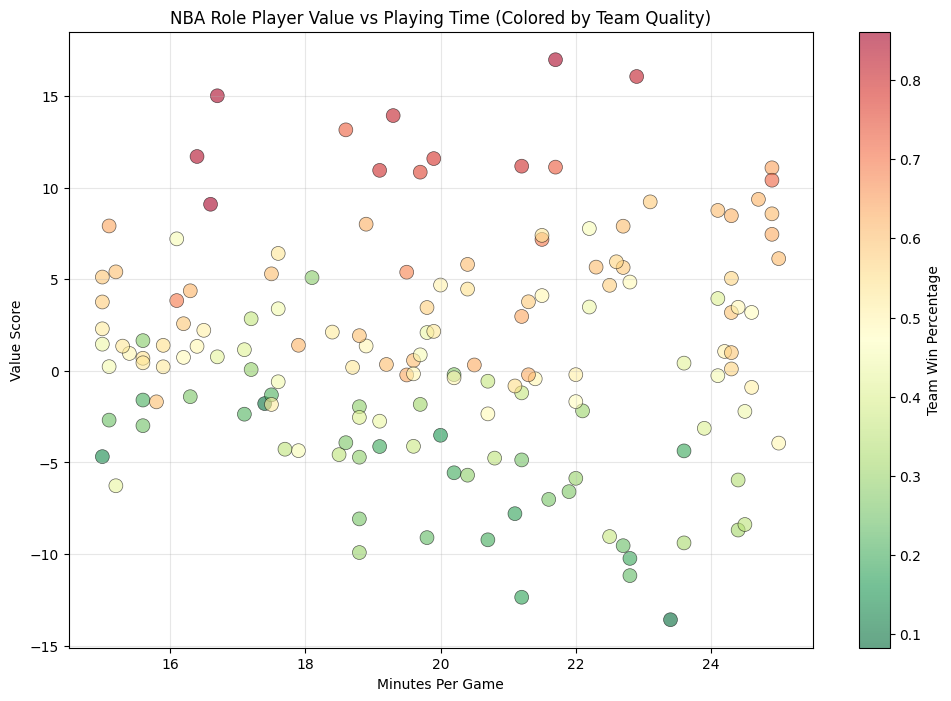

In [158]:

plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    x=role_players['MIN'],
    y=role_players['value_score'],
    c=role_players['W_PCT'],  # Color by win percentage
    cmap='RdYlGn_r',  # Red for good teams, green for bad teams (reversed)
    s=100,  # Size of points
    alpha=0.6,  # Transparency
    edgecolors = 'black',
    linewidth = 0.5
)

plt.colorbar(scatter, label='Team Win Percentage')

plt.xlabel('Minutes Per Game')
plt.ylabel('Value Score')
plt.title('NBA Role Player Value vs Playing Time (Colored by Team Quality)')

plt.grid(True, alpha=0.3)

plt.savefig(r'D:\NBA Hidden Gem Project\viusalizations\value_vs_minutes.png',dpi = 300, bbox_inches = 'tight')
plt.show()